In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from bs4 import BeautifulSoup
from sklearn.model_selection import GridSearchCV

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
pd.options.mode.chained_assignment = None 

In [0]:
df=pd.read_csv('/content/gdrive/My Drive/mpst_full_data.csv')

In [5]:
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


# **Preprocessing Synopsis**

In [6]:
sent_0 = df['plot_synopsis'].values[0]
print(sent_0)
print("="*50)


Note: this synopsis is for the orginal Italian release with the segments in this certain order.Boris Karloff introduces three horror tales of the macabre and the supernatural known as the 'Three Faces of Fear'.THE TELEPHONERosy (Michele Mercier) is an attractive, high-priced Parisian call-girl who returns to her spacious, basement apartment after an evening out when she immediately gets beset by a series of strange phone calls. The caller soon identified himself as Frank, her ex-pimp who has recently escaped from prison. Rosy is terrified for it was her testimony that landed the man in jail. Looking for solace, Rosy phones her lesbian lover Mary (Lynda Alfonsi). The two women have been estranged for some time, but Rosy is certain that she is the only one who can help her. Mary agrees to come over that night. Seconds later, Frank calls again, promising that no matter who she calls for protection, he will have his revenge. Unknown to Rosy, Mary is the caller impersonating Frank. Marry ar

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [9]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_synopsis = []
# tqdm is for printing the status bar
for sentance in tqdm(df['plot_synopsis'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_synopsis.append(sentance.strip())

100%|██████████| 14828/14828 [00:24<00:00, 603.76it/s]


In [0]:
df['preprocessed_plots']=preprocessed_synopsis

In [11]:
df

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,preprocessed_plots
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,note synopsis orginal italian release segments...
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,two thousand years ago nhagruul foul sorcerer ...
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,matuschek gift store budapest workplace alfred...
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,glenn holland not morning person anyone standa...
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,may cuban man named tony montana al pacino cla...
5,tt1315981,A Single Man,George Falconer (Colin Firth) approaches a car...,"romantic, queer, flashback",val,imdb,george falconer colin firth approaches car acc...
6,tt0249380,Baise-moi,Baise-moi tells the story of Nadine and Manu w...,"gothic, cruelty, violence, cult, revenge, sadist",train,wikipedia,baise moi tells story nadine manu go violent s...
7,tt0408790,Flightplan,Kyle Pratt (Jodie Foster) is a propulsion engi...,"mystery, suspenseful, action, murder, flashback",train,imdb,kyle pratt jodie foster propulsion engineer ba...
8,tt0021079,Little Caesar,Small-time Italian-American criminals Caesar E...,violence,train,imdb,small time italian american criminals caesar e...
9,tt1615065,Savages,The movie begins with a video being shot of me...,"revenge, neo noir, murder, violence, flashback",train,imdb,movie begins video shot men hands tied behind ...


**Preprocessing Labels**

In [0]:
def remove_spaces(x):
    x=x.split(",")
    nospace=[]
    for item in x:
        item=item.lstrip()
        nospace.append(item)
    return (",").join(nospace)  

In [0]:
df['tags']=df['tags'].apply(remove_spaces)

In [0]:
train=df.loc[(df.split=='train')|(df.split=="val")]
train=train.reset_index()
test=df.loc[df.split=='test']
test=test.reset_index()

**SPLITTTING INTO TRAIN AND TEST**

In [15]:
print("Total number of points for training: ",train.shape[0])
print("Total number of points for test: ",test.shape[0])

Total number of points for training:  11862
Total number of points for test:  2966


**Vectorizing multi-label tags**

In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train = vectorizer.fit_transform(train['tags']).toarray()
y_test=vectorizer.transform(test['tags']).toarray()

In [17]:
y_train.shape

(11862, 71)

# **MODELS**

 **BASELINE MODEL:ALLOCATING TOP 3 MOST FREQUENT TAGS FOR ALL THE DATA POINTS**

In [0]:
top_three_tags="murder,violence,romantic"

In [0]:
test['baseline_prediction']=top_three_tags

In [0]:
multilabel_y_test_baseline = vectorizer.transform(test['baseline_prediction'])

In [0]:
print("micro f1 scoore :",metrics.f1_score(y_test,multilabel_y_test_baseline, average = 'micro'))

micro f1 scoore : 0.29609375


**This is our baseline model**

In [0]:
def plot_scores(df):
  
  figure=plt.figure()
  
  plt.plot(np.log10(np.array([10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1])),df.mean_train_score,label="Train")
  plt.plot(np.log10(np.array([10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1])),df.mean_test_score,label="Test")
  plt.xlabel("Log10 of parameters")
  plt.ylabel("F1_micro")
  plt.title("F1_micro vs log10 of parameters")
  plt.xlim((-5,2))
  plt.legend()
  plt.show()
 

**LINEAR MODELS**


1.   Logistic regression



In [0]:
vectorizer = TfidfVectorizer(min_df=15,max_df=0.9)
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:


params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.6min finished


The best cross-validation score: 0.286537129003598
The best parameters: {'estimator__alpha': 1e-05}


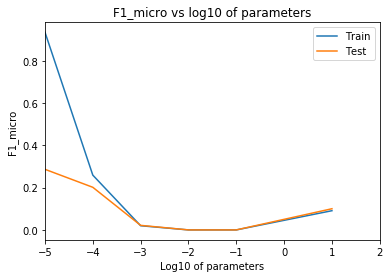

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:


classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.4462, Recall: 0.2276, F1-measure: 0.3014



2.  Linear SVM



In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.9min finished


The best cross-validation score: 0.28152269967303
The best parameters: {'estimator__alpha': 1e-05}


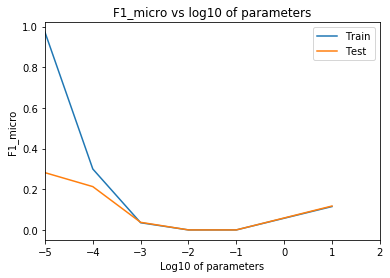

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.3523, Recall: 0.2676, F1-measure: 0.3041


**We see that the linear models on basic tfidf vectorization do not produce good results infact they are poor than the base model **

# **FEATURE ENGINEERING AND TWEAKING**

**BI-GRAM MODEL**

In [0]:
vectorizer = TfidfVectorizer(min_df=5,ngram_range=(2,2))
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.3min finished


The best cross-validation score: 0.20976129949120373
The best parameters: {'estimator__alpha': 1e-05}


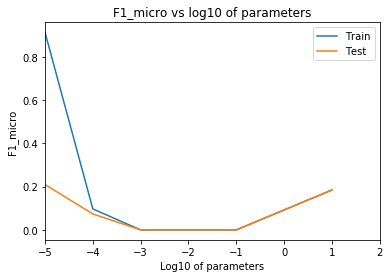

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.5407, Recall: 0.1599, F1-measure: 0.2469


**TRIGRAM**

In [0]:
vectorizer = TfidfVectorizer(min_df=5,ngram_range=(3,3))
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:
params = {
    "estimator__alpha":[10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.2s finished


The best cross-validation score: 0.19522724829765858
The best parameters: {'estimator__alpha': 1e-05}


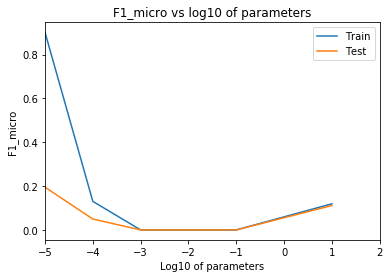

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.3040, Recall: 0.1490, F1-measure: 0.2000


**N-GRAM**

In [0]:
vectorizer = TfidfVectorizer(min_df=5,ngram_range=(1,3))
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:
params = {
    "estimator__alpha":[10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 11.7min finished


The best cross-validation score: 0.2773359371242069
The best parameters: {'estimator__alpha': 1e-05}


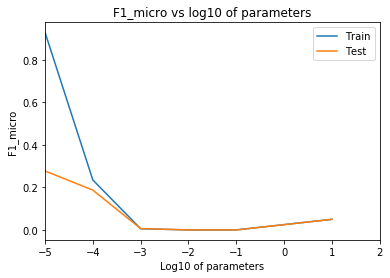

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.4667, Recall: 0.2188, F1-measure: 0.2979


**As the distribution of tags is skewed,the best way would be to try and classify few tags .As the average number of tags is 3.Lets narrow down our appraoach to guess 3 and 4 tags.**


**BI-GRAM MODEL**

**TAKING ONLY 3 TAGS**

In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true',max_features = 3)
y_train = vectorizer.fit_transform(train['tags'])
y_test=vectorizer.transform(test['tags'])

In [0]:
vectorizer = TfidfVectorizer(min_df=5,ngram_range=(2,2))
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    6.3s finished


The best cross-validation score: 0.4230597911354935
The best parameters: {'estimator__alpha': 1e-05}


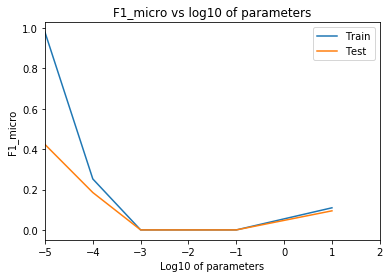

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.5969, Recall: 0.3794, F1-measure: 0.4639


**TAKING 4 TAGS**

In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true',max_features = 4)
y_train = vectorizer.fit_transform(train['tags'])
y_test=vectorizer.transform(test['tags'])

In [0]:
vectorizer = TfidfVectorizer(min_df=5,ngram_range=(2,2))
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    8.7s finished


The best cross-validation score: 0.3975780570743171
The best parameters: {'estimator__alpha': 1e-05}


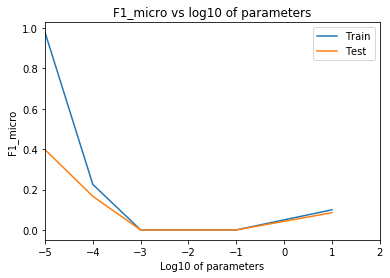

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.5864, Recall: 0.3604, F1-measure: 0.4464


**We see that as we are increasing the tag numbers the f1-score is going down**

**Char-3 grams with all the tags**

In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train = vectorizer.fit_transform(train['tags'])
y_test=vectorizer.transform(test['tags'])

In [0]:
vectorizer = TfidfVectorizer(min_df=5,ngram_range=(3,3), analyzer='char')
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 15.2min finished


The best cross-validation score: 0.2817319047520408
The best parameters: {'estimator__alpha': 1e-05}


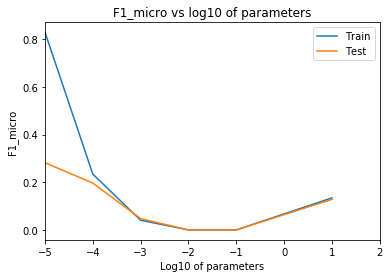

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict (x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.4619, Recall: 0.2181, F1-measure: 0.2963


**Nothing significant at char-level tfidf**



---



**Featurization inspired by-https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/**

https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28

**TOPIC MODELLING WITH LDA**

CREATING DATA MATRIX

In [21]:
import pickle
import gensim
import spacy
import pandas as pd
import nltk; nltk.download('stopwords')
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
vectorizer_topic =CountVectorizer(min_df=15,max_df=0.9)
vectorizer_topic.fit(train['preprocessed_plots'])
m_train=vectorizer_topic.transform(train['preprocessed_plots'])
m_test=vectorizer_topic.transform(test['preprocessed_plots'])

In [19]:
m_train.shape

(11862, 18909)

In [0]:
lda_model = LatentDirichletAllocation(n_components=15, max_iter=5,learning_method='online',random_state=0,learning_offset=50)
lda_Z = lda_model.fit_transform(m_train)

In [0]:
topic_assigned=np.argsort(lda_Z)[:,0]

In [38]:
pd.DataFrame({'Synopsis':train['preprocessed_plots'],'Label_assigned':topic_assigned})

,Synopsis,Label_assigned
0,note synopsis orginal italian release segments...,11
1,two thousand years ago nhagruul foul sorcerer ...,9
2,glenn holland not morning person anyone standa...,5
3,may cuban man named tony montana al pacino cla...,3
4,george falconer colin firth approaches car acc...,9
5,baise moi tells story nadine manu go violent s...,0
6,kyle pratt jodie foster propulsion engineer ba...,9
7,small time italian american criminals caesar e...,0
8,movie begins video shot men hands tied behind ...,9
9,action takes place years sweden troubled year ...,3


**TOP WORDS FOR EACH TOPIC**

In [44]:
#https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(lda_model,vectorizer_topic.get_feature_names(),10)

Topic 0:
charlie jerry tom rose helen de daniel la el nina
Topic 1:
david henry alice jane house mary father love mother edward
Topic 2:
house back not car jack man one john tells finds
Topic 3:
max anne louis bruno duncan macbeth luther owen fletcher philippe
Topic 4:
not one father life film family also love wife time
Topic 5:
johnny ben laura rachel claire jay simon kay angela kelly
Topic 6:
one king fight back find world battle earth however kill
Topic 7:
frank george bobby julia casey hamlet al vincent ruth kyle
Topic 8:
police money joe men gang kill killed car gun two
Topic 9:
danny marty catherine doc khan kirk singh hercules buddy kumar
Topic 10:
peter jeff larry kim terry brian sara sally spider stephen
Topic 11:
alex bob scott arthur ann maggie lee bugs emily holmes
Topic 12:
school not home new father mother friends day party later
Topic 13:
one dr back harry team ship two not group escape
Topic 14:
not tells says asks back see goes room go get


In [0]:
lda_Z.shape

(11862, 15)

In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(lda_Z, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.6s finished


The best cross-validation score: 0.22374102849735716
The best parameters: {'estimator__alpha': 10}


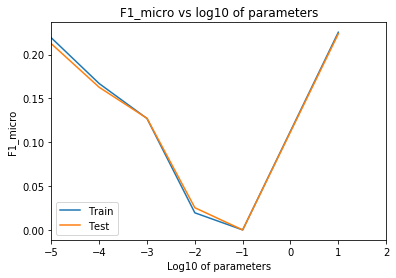

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
lda_t = lda_model.transform(m_test)

In [0]:
lda_t.shape

(2966, 15)

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(lda_Z, y_train)
predictions = classifier.predict(lda_t)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.5772, Recall: 0.0692, F1-measure: 0.1235


**TOPIC LABELS FOR SENTENCES**

In [23]:
lda_model.get_document_topics(m_train[0], minimum_probability=0.0)

AttributeError: ignored

In [0]:
for i in range(len(m_train.shape[0])):
    top_topics = lda_train.get_document_topics(m_train[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    train_vecs.append(topic_vec)



---



**TOPIC MODELLING WITH PARTS OF SPEECH TAGGING**

In [0]:
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
# Let's create a function to pull out nouns and verbs from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'VB'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [0]:
data_nouns_adj = pd.DataFrame(train.preprocessed_plots.apply(nouns_adj))

In [0]:
data_nouns_adj_test = pd.DataFrame(test.preprocessed_plots.apply(nouns_adj))

In [0]:
data_nouns_adj.head()

,preprocessed_plots
0,note synopsis release segments order boris kar...
1,years sorcerer reveled corrupting spread despa...
2,glenn holland morning person anyone standards ...
3,cuban man named montana al pacino claims asylu...
4,george falconer colin firth approaches car acc...


In [0]:
vectorizer =CountVectorizer(min_df=5,max_df=0.8)
vectorizer.fit(data_nouns_adj.preprocessed_plots)
m_train=vectorizer.transform(data_nouns_adj.preprocessed_plots)

In [0]:
m_test=vectorizer.transform(data_nouns_adj_test.preprocessed_plots)

In [0]:
m_train.shape

(11862, 28493)

In [0]:
lda_model = LatentDirichletAllocation(n_components=20, max_iter=10,learning_method='online')
lda_Z_pos = lda_model.fit_transform(m_train)

In [0]:
lda_Z.shape

(11862, 15)

In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(lda_Z_pos, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   28.9s finished


The best cross-validation score: 0.18503314347655092
The best parameters: {'estimator__alpha': 0.0001}


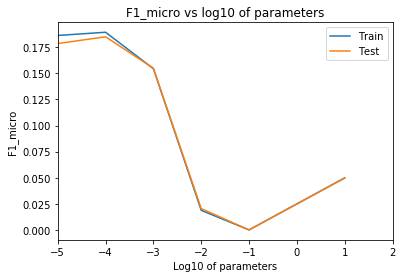

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
lda_t_pos = lda_model.transform(m_test)

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.0001, penalty='l1'), n_jobs=-1)
classifier.fit(lda_Z_pos, y_train)
predictions = classifier.predict(lda_t_pos)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.6411, Recall: 0.0740, F1-measure: 0.1328


**CONCATINATING TF-IDF AND LDA FEATURES TOGTHER**

In [0]:
vectorizer = TfidfVectorizer(min_df=15,max_df=0.9)
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:
x_train.shape

(11862, 18909)

In [0]:
lda_Z.shape

(11862, 15)

In [0]:
from scipy.sparse import coo_matrix, hstack
x_train=hstack((x_train,lda_Z))

In [0]:
x_train.shape

(11862, 18924)

In [0]:
x_test=hstack((x_test,lda_t))

In [0]:
x_test.shape

(2966, 18924)

In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.4min finished


The best cross-validation score: 0.28893653649341705
The best parameters: {'estimator__alpha': 1e-05}


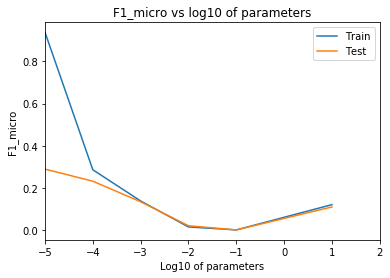

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.4523, Recall: 0.2317, F1-measure: 0.3064


**CREATING TOP 10 WORDS COEFFICIENTS AS FEATURES FOR TOPIC ASSIGNED**

In [0]:
lda_model.components_.shape

(20, 28493)

In [0]:
lda_model.components_.shape

(20, 28493)

In [0]:
topic_assigned_train=lda_Z.argmax(axis=1)
topic_assigned_test=lda_t.argmax(axis=1)

In [0]:

def extract_features(components,topic_assigned):
  topic_features=[]
  for i in topic_assigned:
    
    top_10=sorted(components[i],reverse=True)[:10]
    topic_features.append(top_10)
  return topic_features  

In [0]:
components=lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

In [0]:
train_topic=extract_features(components,topic_assigned_train)

In [0]:

test_topic=extract_features(components,topic_assigned_test)

In [0]:
params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(train_topic, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.6min finished


The best cross-validation score: 0.05075979823788013
The best parameters: {'estimator__alpha': 1e-05}


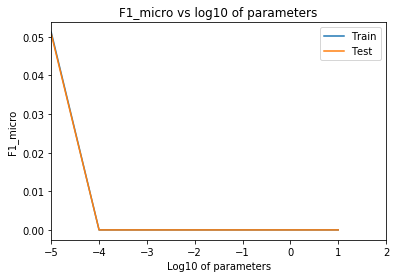

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(train_topic, y_train)
predictions = classifier.predict(test_topic)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.5244, Recall: 0.0262, F1-measure: 0.0498


**CONCAT THE COEFFICIENTS WITH TFIDF AND TOPIC PROBABILITIES**

In [0]:
x_train=hstack((x_train,train_topic))
x_test=hstack((x_test,test_topic))

In [0]:
x_train.shape

(11862, 18934)

In [0]:
from sklearn.linear_model import LogisticRegression

params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(np.sqrt(x_train), y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.5min finished


The best cross-validation score: 0.30603237521675997
The best parameters: {'estimator__alpha': 0.0001}


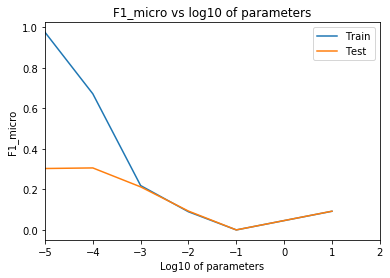

In [0]:
plot_scores(pd.DataFrame(model.cv_results_))

In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.0001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.6668, Recall: 0.1360, F1-measure: 0.2259




---



**WORD EMBEDDINGS**

In [0]:

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [0]:
list_of_sent_train = []

for sent in train['preprocessed_plots'].values:
    list_of_sent_train.append(sent.split())

In [0]:
list_of_sent_test = []

for sent in test['preprocessed_plots'].values:
    list_of_sent_test.append(sent.split())

In [0]:
w2v_model_train = Word2Vec(list_of_sent_train, min_count = 5, size = 50, workers= 4)

In [0]:
#visualising words convered to matrix
w2v_words_train = list(w2v_model_train.wv.vocab)
print('number of words that occured minimum 5 times ',len(w2v_words_train))
print('sample words', w2v_words_train[0:10])

number of words that occured minimum 5 times  48091
sample words ['note', 'synopsis', 'italian', 'release', 'segments', 'certain', 'order', 'boris', 'karloff', 'introduces']


In [0]:
train_w2v = []

for sent in tqdm(list_of_sent_train):
    sent_vect = np.zeros(50)
    cnt_words = 0
    for word in sent:
        if word in w2v_words_train:
            vect = w2v_model_train.wv[word]#creating a matrix of 50 length for each word
            sent_vect += vect 
            cnt_words = cnt_words + 1
    if cnt_words !=0:
        sent_vect /= cnt_words
    
        train_w2v.append(sent_vect)

print(len(train_w2v))
print(len(train_w2v[0]))

100%|██████████| 11862/11862 [18:04<00:00, 13.51it/s]

11862
50


In [0]:
test_w2v = []

for sent in tqdm(list_of_sent_test):
    sent_vect = np.zeros(50)
    cnt_words = 0
    for word in sent:
        if word in w2v_words_train:
            vect = w2v_model_train.wv[word]#creating a matrix of 50 length for each word
            sent_vect += vect 
            cnt_words = cnt_words + 1
    if cnt_words !=0:
        sent_vect /= cnt_words
    
        test_w2v.append(sent_vect)

print(len(test_w2v))
print(len(test_w2v[0]))

100%|██████████| 2966/2966 [04:51<00:00, 10.16it/s]

2966
50


In [0]:
from sklearn.linear_model import LogisticRegression

params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(train_w2v, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.6min finished


The best cross-validation score: 0.2483444525406961
The best parameters: {'estimator__alpha': 1e-05}


In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(train_w2v, y_train)
predictions = classifier.predict(test_w2v)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.6038, Recall: 0.0632, F1-measure: 0.1144


**W2V+TFIDF+LDA TOGETHER**

In [0]:
x_train=hstack((x_train,train_w2v))
x_test=hstack((x_test,test_w2v))

In [0]:
from sklearn.linear_model import LogisticRegression

params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  7.6min finished


The best cross-validation score: 0.2948013892216815
The best parameters: {'estimator__alpha': 1e-05}


In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.3759, Recall: 0.2609, F1-measure: 0.3080




---



**FAST TEXT**

In [0]:
from gensim.models import FastText
model_ted = FastText(list_of_sent_train, size=100, window=5, min_count=5, workers=4,sg=1)


In [0]:
fast_words_train = list(model_ted.wv.vocab)
print('number of words that occured minimum 5 times ',len(fast_words_train))
print('sample words', fast_words_train[0:10])

number of words that occured minimum 5 times  48091
sample words ['note', 'synopsis', 'italian', 'release', 'segments', 'certain', 'order', 'boris', 'karloff', 'introduces']


In [0]:
train_fast = []

for sent in tqdm(list_of_sent_train):
    sent_vect = np.zeros(100)
    cnt_words = 0
    for word in sent:
        if word in fast_words_train:
            vect = model_ted.wv[word]#creating a matrix of 50 length for each word
            sent_vect += vect 
            cnt_words = cnt_words + 1
    if cnt_words !=0:
        sent_vect /= cnt_words
    
        train_fast.append(sent_vect)

print(len(train_fast))
print(len(train_fast[0]))

100%|██████████| 11862/11862 [18:45<00:00, 10.54it/s]

11862
100


In [0]:
test_fast = []

for sent in tqdm(list_of_sent_test):
    sent_vect = np.zeros(100)
    cnt_words = 0
    for word in sent:
        if word in fast_words_train:
            vect = model_ted.wv[word]#creating a matrix of 50 length for each word
            sent_vect += vect 
            cnt_words = cnt_words + 1
    if cnt_words !=0:
        sent_vect /= cnt_words
    
        test_fast.append(sent_vect)

print(len(test_fast))
print(len(test_fast[0]))

100%|██████████| 2966/2966 [04:56<00:00,  9.99it/s]

2966
100


In [0]:
from sklearn.linear_model import LogisticRegression

params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(train_fast, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.2min finished


The best cross-validation score: 0.2447451822236593
The best parameters: {'estimator__alpha': 1e-05}


In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(train_fast, y_train)
predictions = classifier.predict(test_fast)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.5849, Recall: 0.1726, F1-measure: 0.2665




---



**CONCAT FAST-TEXT AND TFIDF**

In [0]:
vectorizer = TfidfVectorizer(min_df=15,max_df=0.9)
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:
from scipy.sparse import coo_matrix, hstack
x_train=hstack((x_train,train_fast))
x_test=hstack((x_test,test_fast))

In [0]:
from sklearn.linear_model import LogisticRegression

params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.6min finished


The best cross-validation score: 0.2894519229473909
The best parameters: {'estimator__alpha': 1e-05}


In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.3981, Recall: 0.2476, F1-measure: 0.3053




---



**GLOVE MODEL WITH TEXT**

In [0]:
import numpy as np
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [46]:
glove_model=loadGloveModel('/content/gdrive/My Drive/glove.6B.50d.txt')

Loading Glove Model
Done. 400000  words loaded!


In [50]:
train_glove = []

for sent in tqdm(list_of_sent_train):
    sent_vect = np.zeros(50)
    cnt_words = 0
    for word in sent:
        if word in glove_model:
            vect = glove_model[word]#creating a matrix of 50 length for each word
            sent_vect += vect 
            cnt_words = cnt_words + 1
    if cnt_words !=0:
        sent_vect /= cnt_words
    
        train_glove.append(sent_vect)

print(len(train_glove))

100%|██████████| 11862/11862 [00:10<00:00, 1177.37it/s]

11862


In [51]:
test_glove = []

for sent in tqdm(list_of_sent_test):
    sent_vect = np.zeros(50)
    cnt_words = 0
    for word in sent:
        if word in glove_model:
            vect = glove_model[word]#creating a matrix of 50 length for each word
            sent_vect += vect 
            cnt_words = cnt_words + 1
    if cnt_words !=0:
        sent_vect /= cnt_words
    
        test_glove.append(sent_vect)

print(len(test_glove))

100%|██████████| 2966/2966 [00:02<00:00, 1167.07it/s]

2966


In [0]:
from sklearn.linear_model import LogisticRegression

params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(train_glove, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.5min finished


The best cross-validation score: 0.239770405291418
The best parameters: {'estimator__alpha': 1e-05}


In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(train_glove, y_train)
predictions = classifier.predict(test_glove)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.5605, Recall: 0.1288, F1-measure: 0.2095




---



**GLVOE VECTORS +LDA FEATURES**

In [0]:
from scipy.sparse import coo_matrix, vstack


In [0]:
x_train=np.hstack((np.array(train_glove),lda_Z))
x_test=np.hstack((np.array(test_glove),lda_t))

In [68]:
from sklearn.linear_model import LogisticRegression

params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.4min finished


The best cross-validation score: 0.25342883143012535
The best parameters: {'estimator__alpha': 0.0001}


In [72]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-03, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.6340, Recall: 0.1148, F1-measure: 0.1944


**GLOVE VECTOR+LDA+TFIDF**

In [0]:
vectorizer = TfidfVectorizer(min_df=15,max_df=0.9)
vectorizer.fit(train['preprocessed_plots'])
x_train_tf=vectorizer.transform(train['preprocessed_plots'])
x_test_tf=vectorizer.transform(test['preprocessed_plots'])

In [0]:
x_train=hstack((x_train,x_train_tf))
x_test=hstack((x_test,x_test_tf))

In [79]:
from sklearn.linear_model import LogisticRegression

params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)

model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  7.2min finished


The best cross-validation score: 0.2933276744111386
The best parameters: {'estimator__alpha': 1e-05}


In [91]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.3703, Recall: 0.2703, F1-measure: 0.3125


 THIS IS OUR BEST ML MODEL WITH F1-SCORE OF 0.3125

# **DEEP-LEARNING MODELS**

In [0]:
train=df.loc[df.split=='train']
cv=df.loc[df.split=="val"]
cv=cv.reset_index()
train=train.reset_index()
test=df.loc[df.split=='test']
test=test.reset_index()

In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train = vectorizer.fit_transform(train['tags']).toarray()
y_test=vectorizer.transform(test['tags']).toarray()
y_cv=vectorizer.transform(cv['tags']).toarray()

In [0]:
import tensorflow as tf

session_conf = tf.ConfigProto(
 intra_op_parallelism_threads=1, 
                        inter_op_parallelism_threads=1, 
                      )

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [0]:
train.preprocessed_plots.str.split().apply(len).max()


6044

In [0]:
t = Tokenizer()
t.fit_on_texts(train.preprocessed_plots)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(train.preprocessed_plots)
max_length = vocab_size
padded_docs = pad_sequences(encoded_docs, maxlen=1000, padding='post')
print(padded_docs)

[[  680  4577 54887 ...     0     0     0]
 [    6  4356    69 ...     0     0     0]
 [ 2771  4762   102 ...    19    66  6797]
 ...
 [   66  2554   401 ...     0     0     0]
 [ 4799  2605  2908 ...     0     0     0]
 [ 1160  2299  2425 ...     0     0     0]]


In [0]:
padded_docs.shape

(9489, 1000)

In [0]:
encoded_docs_test = t.texts_to_sequences(test.preprocessed_plots)
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=1000, padding='post')
encoded_docs_cv = t.texts_to_sequences(cv.preprocessed_plots)
padded_docs_cv = pad_sequences(encoded_docs_cv, maxlen=1000, padding='post')



In [0]:
embedding_matrix = np.zeros((vocab_size,50))
for word, i in t.word_index.items():
	embedding_vector = glove_model.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [0]:
import tensorflow as tf
from sklearn.metrics import f1_score
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from time import time
from keras.callbacks import ModelCheckpoint

def f1micro(y_true, y_pred):
    return tf.py_func(f1_score(y_true, y_pred,average='mirco'),tf.double)


In [0]:
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_f1micro', verbose=0, save_best_only=True, mode='max')

In [0]:
model_glove = Sequential()
model_glove.add(Embedding(vocab_size,output_dim=embedding_matrix.shape[1],input_length=1000,weights=[embedding_matrix], trainable=False))
model_glove.add(LSTM(256, return_sequences=True,activation='relu'))
model_glove.add(Flatten())
model_glove.add(Dense(256, activation='relu'))
model_glove.add(Dropout(0.5))
model_glove.add(Dense(256, activation='relu'))
model_glove.add(Dropout(0.5))
model_glove.add(Dense(71, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam')
## Fit train data
model_glove.fit(padded_docs, y_train,validation_data=(padded_docs_cv,y_cv), epochs =5,batch_size=32,callbacks=[tensorboard])

Train on 9489 samples, validate on 2373 samples
Epoch 1/5
9489/9489 [==============================] - 630s 66ms/step - loss: 0.1923 - val_loss: 0.1421
Epoch 2/5
9489/9489 [==============================] - 628s 66ms/step - loss: 0.1458 - val_loss: 0.1376
Epoch 3/5
9489/9489 [==============================] - 629s 66ms/step - loss: 0.1372 - val_loss: 0.1348
Epoch 4/5
9489/9489 [==============================] - 628s 66ms/step - loss: 0.1307 - val_loss: 0.1333
Epoch 5/5
9489/9489 [==============================] - 626s 66ms/step - loss: 0.1257 - val_loss: 0.1320


In [0]:
predictions=model_glove.predict([padded_docs_test])

In [0]:
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [0]:
for val in thresholds:
  pred=predictions.copy()
  
  pred[pred>=val]=1
  pred[pred<val]=0
  
  precision = precision_score(y_test, pred, average='micro')
  recall = recall_score(y_test, pred, average='micro')
  f1 = f1_score(y_test, pred, average='micro')
   
  print("Micro-average quality numbers")
  print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.2382, Recall: 0.5715, F1-measure: 0.3363
Micro-average quality numbers
Precision: 0.3469, Recall: 0.3925, F1-measure: 0.3683
Micro-average quality numbers
Precision: 0.4471, Recall: 0.2673, F1-measure: 0.3346
Micro-average quality numbers
Precision: 0.5391, Recall: 0.1879, F1-measure: 0.2786
Micro-average quality numbers
Precision: 0.6162, Recall: 0.1276, F1-measure: 0.2114
Micro-average quality numbers
Precision: 0.6944, Recall: 0.0693, F1-measure: 0.1260
Micro-average quality numbers
Precision: 0.7507, Recall: 0.0297, F1-measure: 0.0571
Micro-average quality numbers
Precision: 0.8571, Recall: 0.0047, F1-measure: 0.0093
Micro-average quality numbers
Precision: 1.0000, Recall: 0.0004, F1-measure: 0.0009


**We get the best score of 0.3682 with threshold being 0.2**



---



**WE OBSERVE THAT AS THE TAGS ARE SKEWED THE MODELS WOULD PERFOM BETTER IF WE MADE PRECITIONS ON FEWER **

In [0]:
train=df.loc[(df.split=='train')|(df.split=="val")]
train=train.reset_index()
test=df.loc[df.split=='test']
test=test.reset_index()

In [0]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true',max_features=10)
y_train = vectorizer.fit_transform(train['tags']).toarray()
y_test=vectorizer.transform(test['tags']).toarray()
y_cv=vectorizer.transform(cv['tags']).toarray()

In [0]:
vectorizer = TfidfVectorizer(min_df=15,max_df=0.9)
vectorizer.fit(train['preprocessed_plots'])
x_train=vectorizer.transform(train['preprocessed_plots'])
x_test=vectorizer.transform(test['preprocessed_plots'])

In [0]:


params = {
    "estimator__alpha": [10**-5,10**-4,10**-3,10**-2, 10**-1, 10**1]
}

clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',n_jobs=-1),n_jobs=-1)


model=GridSearchCV(clf, param_grid=params, scoring='f1_micro',n_jobs=-1,return_train_score=True,cv=3,verbose=10)

model.fit(x_train, y_train)

print ("The best cross-validation score:",model.best_score_)
print ("The best parameters:",model.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   54.2s finished


The best cross-validation score: 0.37752488857230615
The best parameters: {'estimator__alpha': 1e-05}


In [0]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=1e-05, penalty='l1'), n_jobs=-1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.4868, Recall: 0.3429, F1-measure: 0.4024


# **CONCLUSION**

In [92]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "Featurization","F1-score","Number of tags"]

x.add_row(["Logistic", "Tf-IDF",0.3014,71])
x.add_row(["SVM","TF-IDF",0.3041,71])
x.add_row(["Logistic", "BI-GRAM",0.24,71])
x.add_row(["Logistic", "TRIGRAM",0.20,71])
x.add_row(["Logistic", "N-GRAM",0.29,71])
x.add_row(["Logistic", "Char-3-GRAM",0.2963,71])
x.add_row(["Logistic", "Topic modeling usig lda-topic probabilties",0.12,71])
x.add_row(["Logistic", "Topic modeling usig lda-topic probabilties with parts of speech taggig",0.13,71])
x.add_row(["Logistic", "Topic modeling usig lda-topic probabilties+tfidf",0.3064,71])
x.add_row(["Logistic", "Topic modeling usig lda-word probabilties",0.049,71])
x.add_row(["Logistic", "Topic modeling usig lda-word probabilties+Above featurization",0.22,71])
x.add_row(["Logistic", "word embedding-word2vec",0.11,71])
x.add_row(["Logistic", "word embedding-word2vec+tfidf",0.308,71])
x.add_row(["Logistic", "word embedding-Fast-text",0.26,71])
x.add_row(["Logistic", "word embedding-Fast-text+tfidf",0.3053,71])
x.add_row(["Logistic", "word embedding-glove",0.20,71])
x.add_row(["Logistic", "word embedding-glove+lda",0.19,71])
x.add_row(["Logistic", "word embedding-glove+lda+tfidf",0.3125,71])
x.add_row(["Logistic", "lastm-256-dense-256-dense-256-dense-71",0.368,71])
x.add_row(["Logistic", "Tf-IDF",0.40,10])



print(x)


+----------+------------------------------------------------------------------------+----------+----------------+
|  Model   |                             Featurization                              | F1-score | Number of tags |
+----------+------------------------------------------------------------------------+----------+----------------+
| Logistic |                                 Tf-IDF                                 |  0.3014  |       71       |
|   SVM    |                                 TF-IDF                                 |  0.3041  |       71       |
| Logistic |                                BI-GRAM                                 |   0.24   |       71       |
| Logistic |                                TRIGRAM                                 |   0.2    |       71       |
| Logistic |                                 N-GRAM                                 |   0.29   |       71       |
| Logistic |                              Char-3-GRAM                               |  0

**OBSERVATIONS**

1.   Even with our simplest of models we are able to acheive a score of 0.4024
2.   Taking fewer tags increase our scores as our tags distrubution is skewed and average number of tags per plot is only 3
3.   With all the 71 tags our best score was 0.368 ,that too using deep learning models

